## **Density Based Clustering**
Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

### **Required Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

### **Loading dataset**

In [6]:
''' reading dataset '''

df = pd.read_csv('CC GENERAL.csv')

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.shape

(8950, 18)

In [10]:
''' Dropping the CUST_ID column from the data '''
df = df.drop('CUST_ID', axis = 1)

In [11]:
'''Handling the missing values'''
df.fillna(method ='ffill', inplace = True)

In [12]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### **Preprocessing the data**

In [14]:
'''Scaling the data to bring all the attributes to a comparable level'''
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
  
''' Normalizing the data so that '''
df_normalized = normalize(df_scaled)
  
'''Converting the numpy array into a pandas DataFrame'''
df_normalized = pd.DataFrame(df_normalized)

### **Reducing the dimensionality of the data to make it visualizable**
`Principal Component Analysis or PCA` is a widely used technique for dimensionality reduction of the large data set. Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize.

In [16]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
print(df_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268880
3 -0.481656 -0.097611
4 -0.563512 -0.482506


### **Building the clustering model**

In [18]:
'''Numpy array of all the cluster labels assigned to each data point'''
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df_principal)
labels = db_default.labels_

### **Visualizing the clustering**

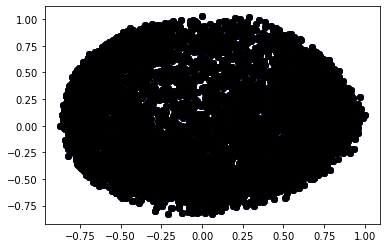

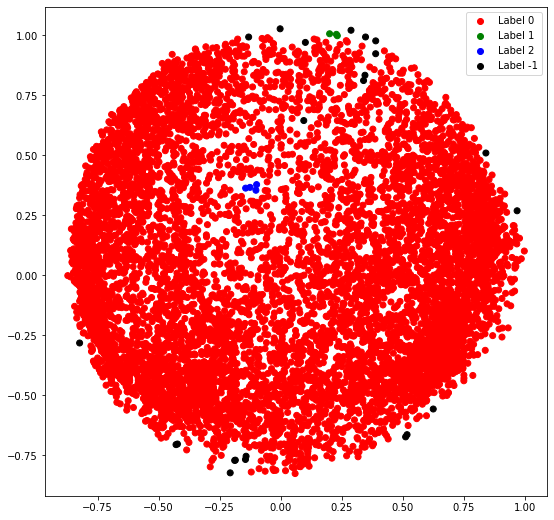

In [22]:
'''Building the label to colour mapping'''
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
'''Building the colour vector for each data point'''
cvec = [colours[label] for label in labels]
  
'''For the construction of the legend of the plot'''
r = plt.scatter(df_principal['P1'], df_principal['P2'], color ='r');
g = plt.scatter(df_principal['P1'], df_principal['P2'], color ='g');
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b');
k = plt.scatter(df_principal['P1'], df_principal['P2'], color ='k');
  
'''Plotting P1 on the X-Axis and P2 on the Y-Axis '''
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
  
'''Building the legend'''
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()